---

# P4.A:  SVM을 이용하여 선형 분류 (8점)

### 학습목표
- SVM 모델을 이용하여 선형 분류 가능한 데이터를 분류하는 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 가능한 데이터셋을 분류하는 분류기를 학습해봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 주어진 데이터셋 loading
- 2) SVM 모델 구현, 학습 **<직접 구현>**
- 3) SVM 모델 검증
- 4) Decision Boundary 시각화 
- 5) SVM with soft margin **<직접 구현>**
- 6) Discussion

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- SVM 모델 작성: 8점
- 본 실습과제에서는 Discussion 성실도에 따른 감점 최대 2점



## Imports

No module named 'sklearn' 에러 발생 시 `conda install scikit-learn` 명령어를 통해 scikit-learn 패키지를 설치해주시기 바랍니다. 

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset
코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [2]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset_svm.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

112 112


### Dataset Split & Visualization
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
import random


# 랜덤시드 설정
random.seed(1234)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

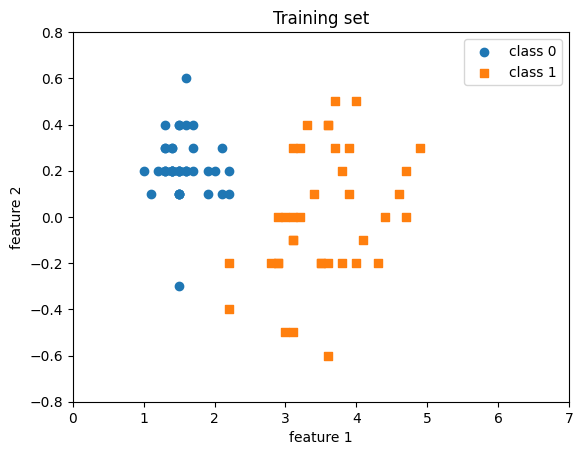

In [4]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2) SVM 모델 구현, 학습
이 부분에서는 Scikit-Learn의 SVC 모듈의 **linear** 커널을 이용하여 선형 SVM모델을 선언하고 학습합니다.

여기서 사용하는 SVC 클래스는 C-Support Vector Classification으로 SVM을 사용한 분류기 모델입니다.

SVC class에서는 kernel 파라미터를 이용하여 사용하는 커널의 형태를 변경할 수 있습니다. 이번 실습에서는 **'linear'(선형)** 커널을 사용한 선형 SVM을 이용합니다.

**세부 구현 사항:**
- kernel은 'linear'
- Hard margin을 사용하기 위해 하이퍼파라미터 C=100으로 설정

**유의사항:**
- SVC 모듈의 하이퍼파라미터인 C는 강의 시간에 배운 하이퍼파라미터 C와 유사하나, SVC 모듈의 경우 C가 커질 수록 Hard margin에 가까워짐
- 자세한 설명(하이퍼파라미터, 학습방법)은 scikit-learn의 공식 document를 참조 바랍니다. 
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [5]:
svm = SVC(kernel='linear', C=100)
##### <your code> training with train dataset
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear')

## 3) 모델 검증
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [6]:
# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 100.00%
Test set accuracy: 93.75%


## 4) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

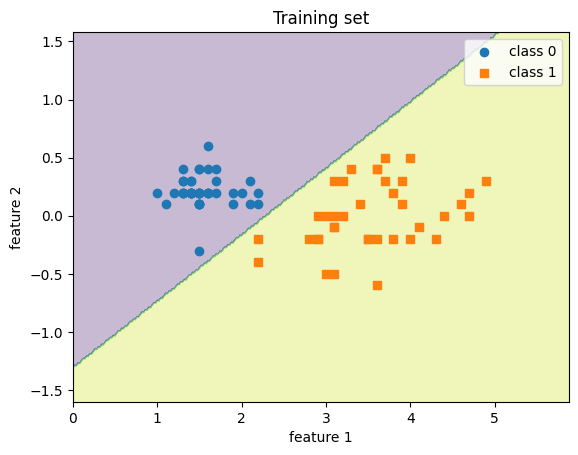

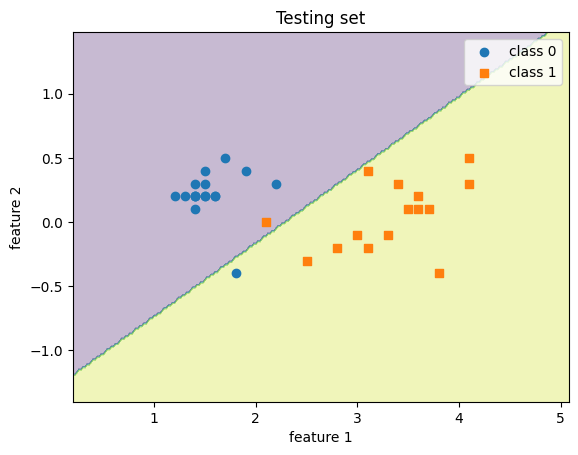

In [7]:
### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 5) SVM with soft margin

위에서 실습한 선형 SVM 모델은 hard margin을 사용했습니다.이번에는 soft margin을 사용하여 학습 및 검증을 진행해 봅니다.

**세부 구현 사항:**
- kernel은 'linear'
- Soft margin을 사용하기 위해 하이퍼파라미터 C=0.05으로 설정

Train set accuracy: 97.50%
Test set accuracy: 96.88%


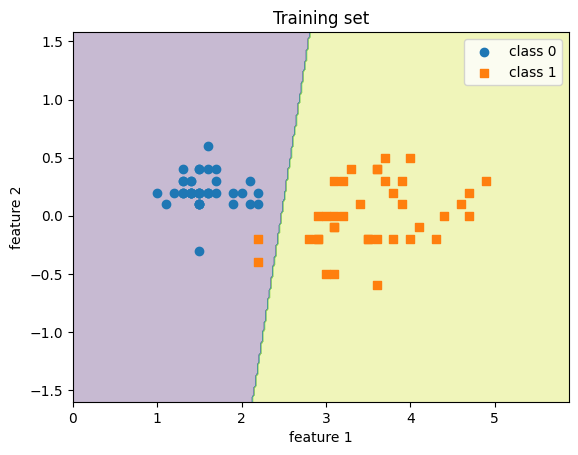

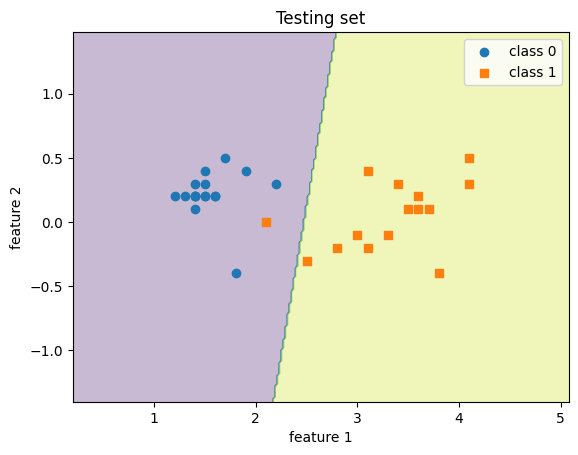

In [8]:
##### <your code> training with train dataset
svm = SVC(kernel='linear', C=0.05)
svm.fit(X_train, y_train)



# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 6) Discussion

**1) 이전 실습에서 사용된 Perceptron 과 SVM의 차이점에 대해 설명해보세요.**

[답변작성]

퍼셉트론은 데이터가 선형적으로 분리 가능하다는 가정 하에 작동하며, 이를 통해 결정 경계(분류를 위한 직선 또는 초평면)를 찾는다. 하지만 이 결정 경계는 데이터를 올바르게 분리하기만 하면 되므로, 데이터를 분리하는 무수히 많은 경계 중 어느 것이 선택되는지는 초기 가중치나 학습률 등에 따라 달라진다.
반면에, SVM은 마진을 최대화하는 결정 경계를 찾는 것을 목표로 하기때문에, SVM은 일반화 성능을 향상시킨다고 볼 수 있다.

퍼셉트론은 간단한 학습 알고리즘을 사용합니다. 퍼셉트론은 잘못 분류된 샘플에 대해 가중치를 조정하며, 모든 샘플이 올바르게 분류될 때까지 이 과정을 반복합니다. 이런 방식 때문에 퍼셉트론은 선형적으로 분리할 수 없는 데이터에 대해선 수렴하지 못합니다.
SVM은 최적화 문제를 해결하여 결정 경계를 찾습니다. 일반적으로 이 작업은 성능이 좋은 솔버를 사용한 볼록 최적화 문제로 구성됩니다. SVM은 이 과정을 통해 모델의 복잡도와 오차 사이에 적절한 균형을 찾습니다.

퍼셉트론은 기본적으로 선형 분류기이기 때문에 비선형 분류를 위해선 추가적인 차원 변환등의 데이터 가공이 필요하다.
반면에 SVM은 커널 트릭을 사용하여 비선형 분류 문제를 해결할 수 있다. 커널 함수를 사용하면, SVM은 고차원 공간에서 결정 경계를 찾을 수 있다.

**2) 선형 SVM에서의 hard margin과 soft margin의 차이를 설명하고, 본 실습 결과를 바탕으로 주어진 데이터셋에 더 적절한 방법은 무엇인지 설명하세요.**

[답변작성]
hard margin acc : 93.75%
soft margin acc : 96.88% 이다.
이번 실습에서는 soft margin이 좀 더 좋은 결과를 보였다.
Hard Margin SVM은 학습 데이터의 모든 샘플을 완벽하게 분류하려고 시도한다. 즉, 결정 경계와 모든 샘플 사이에 오류는 없어야 하며, 이를 통해 max margin을 찾고자 한다.
반면에 Soft Margin SVM은 일부 오류를 허용하며, 이를 통해 모델의 일반화 성능을 향상시킨다. 이 방식은 결정 경계와 일부 샘플 사이의 "슬랙 변수"를 도입하여, 일부 샘플이 결정 경계를 넘어가거나, 잘못 분류되는 것을 허용한다. 이 슬랙 변수를 통해 SVM은 더 유연한 결정 경계를 형성하며, 이는 실제 세계의 복잡하고 노이즈가 있는 데이터에 대해 더 잘 작동한다


---

# P4.B:  SVM을 이용하여 비선형 분류 (7점)

### 학습목표
- SVM 모델을 이용하여 **선형 분류 불가능**한 데이터를 분류하는 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 불가능한 데이터셋을 분류하는 분류기를 학습해봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) SVM 모델 구현, 학습, 검증, Decision Boundary 시각화 **<직접 구현>**
- 3) Discussion


### 점수
- Trainset과 Testset 정확도 95% 이상: 7점
- Trainset과 Testset 정확도 94% 이상: 6점
- Trainset과 Testset 정확도 93% 이상: 5점
- 본 실습과제에서는 Discussion 성실도에 따른 감점 최대 2점


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

## 1) 데이터셋 loading

In [10]:
# CSV 파일을 읽기
dataset = np.loadtxt("xor_dataset.csv", delimiter=",")
X = dataset[:, :2]
y = dataset[:, 2].astype(int)
print(len(X), len(y))

200 200


### Dataset Split, 시각화

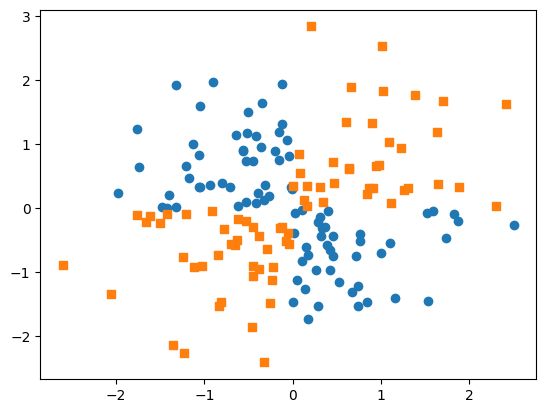

In [11]:
# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 160개 까지는 학습용으로 뒤 40개는 테스트용으로 split
X_train = [X[i] for i in idx[:160]]
y_train = [y[i] for i in idx[:160]]
X_test = [X[i] for i in idx[160:]]
y_test = [y[i] for i in idx[160:]]

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            marker='s')
plt.show()

## 2) SVM 모델 구현, 학습, 검증

비선형 커널을 사용하는 SVM모델을 이용하여 위 데이터셋을 분류하는 분류기를 학습합니다.

- 선형 SVM 모델과 동일하게 SVC 모듈을 사용하지만, 'kernel' 파라미터를 조절하여 비선형 SVM 모델을 구현합니다.

### 선형 불가능한 문제
![](https://blog.kakaocdn.net/dn/1hyfi/btqwdhw53hZ/s33aTg9XF2ZDnoPkKs4IT0/img.png)

위 그림은 선형분리가 불가능한 데이터셋을 어떻게 커널 SVM이 분류하게 하는지 보여줍니다.
위 데이터셋은 2차원 평명상에서는 선형 분리가 불가능하지만, 오른쪽 처럼 3차원에서 보면 한 평면으로 분리가 가능합니다.
여기서 커널은 2차원 데이터를 3차원으로 매핑하는 함수를 의미하며, 커널의 모양에 따라 linear(선형), poly(다항), rbf(가우시안), sigmoid(시그모이드) 등으로 구분됩니다.
3차원상의 데이터를 구분하는 평면을 결정 평면이라고 합니다. 

그러나 커널은 단순히 2차원 데이터를 3차원으로 만 매핑하는것이 아니라 n차원 데이터를 n차원보다 높음 m차원으로 매핑 할 수 있습니다.
따라서 3차원 이상의 차원에서의 결정 경계를 결정 초평면이라고합니다.

정리하자면 커널 SVM은 다음과정을 통해 학습됩니다.
- 1) 커널함수를 이용해 데이터를 초공간으로 매핑
- 2) 매핑된 초공간에서 margin이 최대화 되는 결정 초평면 탐색

하지만 커널함수를 모든 데이터셋에 적용하게 되면 데이터셋이 커질수록 계산복잡도가 증가하게 됩니다. 따라서 우리는 모든 데이터셋에 적용하는것이 아니라 꼼수(Trick)을 써서 커널함수를 적용하게 됩니다. 이를 커널 트릭(Kernel Trick)이라고 합니다.

**더 읽을 거리**
- [커널 함수와 커널 트릭](https://en.wikipedia.org/wiki/Kernel_method)

본 실습에서 제공하는 데이터는 선형커널로는 분류가 불가능합니다. 위에서 설명한 커널들로 아래 코드를 변경하면서 **최적의 커널 및 하이퍼파라메터**를 찾아보세요.

사용가능한 파라미터는 다음과 같습니다.
- **kernel**: 'rbf', 'poly', 'sigmoid' 등의 커널 종류를 선택합니다.
- **C**: 규제 파라미터로서 값이 작을 수록 찾아지는 결정 경계의 마진이 커집니다.
- **gamma**: rbf, poly, sigmoid 커널에 사용되는 값으로 커널의 영향력을 나타냅니다. 값이 커질 수록 커널의 영향력이 커저 결정경계는 더 샘플에 가까워지고 구불구불하게 됩니다.

이외의 파라미터는 오른쪽 사이트를 참고하세요.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Train set accuracy: 99.38%
Test set accuracy: 97.50%


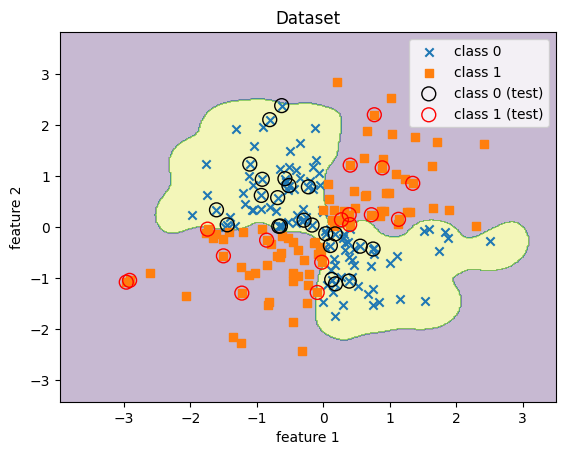

In [23]:
##### <your code> SVC module for Non-linear SVM
svm = SVC(kernel='rbf', C = 10, gamma =10)

##### <your code> training with train dataset
svm.fit(X_train, y_train)

# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 0 (test)', facecolors='none', edgecolor='black', s=100, marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 1 (test)', facecolors='none', edgecolor='red', s=100, marker='o')


# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 3) Discussion

**1) 학습, 테스트 정확도는 얼마인가요? (위 숫자를 복사하세요.)**

Train set accuracy: 99.38%
Test set accuracy: 97.50%

**2) 본 실습에서 최종적으로 사용한 커널은 무엇인지 쓰고, 다른 커널들과 비교했을 때의 장단점(각 커널의 특성을 고려하여)을 설명하세요.**

[답변작성]
사용한 커널: rbf
다른 커널과 비교했을때 장단점  
장점:
비선형 문제 해결: RBF 커널은 데이터를 고차원 공간으로 매핑하여 복잡한 비선형 문제를 해결할 수 있다. 이를 통해 선형 분류기가 구분하지 못하는 복잡한 패턴을 찾을 수 있다.
단점:
고차원 공간: RBF 커널은 데이터를 고차원 공간으로 매핑하기 때문에, 계산 비용이 높다.. 또한, 이 과정은 "차원의 저주"를 야기할 수 있으며, 모델이 과적합될 가능성이 있다.
해석이 어려움: RBF 커널은 복잡한 비선형 결정 경계를 생성하므로, 생성된 모델이 해석하기 어렵습니다. 이는 특히 데이터 과학자가 모델의 결정 방식을 설명해야 하는 상황에서 문제가 될 수 있습니다.

다른 커널들: 

polynomial:
장점:높은 차수의 다항식을 통해 복잡한 패턴을 잘 찾아낼 수 있습니다.
단점: 다항식의 차수 가 너무 크면 overfitting의 위험이 있고, 계산 시간이 오래 걸릴 수 있다.   


sigmoid: 
장점:신경망과 유사한 패턴을 가진 데이터에 대해 좋은 성능을 보일 수 있습니다.
매개변수를 적절하게 조정하면, 선형 커널과 비선형 커널 사이를 전환할 수 있습니다.
단점: Sigmoid 커널은 두 개의 매개변수(감마와 r)를 가지므로, 최적의 매개변수를 찾는 것이 어렵고 시간이 오래 걸릴 수 있습니다. 즉, 매개변수 튜닝이 중요하고 어렵습니다.
이 커널의 성능은 데이터 세트에 크게 의존하며, 일반적으로 RBF 커널이나 다항식 커널보다 성능이 떨어질 수 있습니다.